랜덤 포레스트는 여러 개의 의사결정트리를 결합한 앙상블 모델입니다.

이 모델은 트리 모델을 여러 개 사용하여 예측의 안정성을 높입니다.

## 1. iris

In [ ]:
# 코드 설명

In [ ]:
# # 랜덤 포레스트 모델 생성
# # rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
# 1. RandomForestClassifier
# RandomForestClassifier: RandomForestClassifier는 scikit-learn 라이브러리에서 제공하는 분류 모델입니다. 
# 랜덤 포레스트는 앙상블 학습 방법의 일종으로, 여러 개의 **결정 트리(Decision Tree)**를 조합하여 최종적으로 예측 결과를 도출합니다. 
# 이러한 여러 트리들의 결과를 다수결 방식으로 결합하여 최종 클래스를 결정하는 방식으로, 과적합(overfitting)을 줄이고 예측 성능을 향상시킬 수 있습니다.
# 결정 트리의 앙상블: 여러 결정 트리를 학습하는 과정에서 각각의 트리는 훈련 데이터의 일부를 무작위로 샘플링해 학습합니다. 이때 트리 간에 다양성을 증가시켜 모델이 더 일반화된 예측을 하도록 돕습니다.

# 2. n_estimators=100
# n_estimators: 이 매개변수는 랜덤 포레스트를 구성하는 결정 트리의 개수를 지정합니다. 여기서는 100개의 결정 트리를 사용하겠다는 의미입니다.
# 트리 개수는 많을수록 더 안정적인 결과를 얻을 수 있지만, 계산 비용도 증가합니다. 일반적으로 트리의 개수가 많아질수록 랜덤 포레스트의 예측 성능이 향상되지만, 너무 많은 트리를 사용하면 학습 시간과 메모리 사용량이 커지므로 적절한 값을 선택하는 것이 중요합니다.

# 3. random_state=42
# random_state: 랜덤 포레스트에서 일부 요소들은 무작위로 수행됩니다. 예를 들어, 각 결정 트리의 학습 데이터 샘플링이나 분할 기준을 선택할 때 무작위성이 개입됩니다. random_state는 이러한 무작위성을 고정하여 재현성을 확보하기 위해 사용됩니다. 같은 random_state 값을 사용하면, 같은 데이터셋에서 같은 설정으로 학습할 때 항상 동일한 결과를 얻을 수 있습니다.
# 여기서는 42라는 숫자를 사용해 랜덤성을 고정했습니다. 42는 임의의 숫자일 뿐이며, 다른 정수 값을 사용해도 상관없습니다.


In [ ]:
# 정확도 평가
# accuracy_score(y_test, rf_y_pred)를 사용하여 랜덤 포레스트 모델의 정확도를 평가합니다.

# 혼동 행렬 (Confusion Matrix):
# 혼동 행렬을 계산하여 실제 클래스와 예측된 클래스의 관계를 시각화합니다. 이를 위해 confusion_matrix 함수와 **seaborn.heatmap**을 사용하여 2D 히트맵을 생성합니다.
# 이 시각화는 True Positive, False Positive, True Negative, False Negative를 확인하는 데 유용합니다.


In [ ]:
# 특성 중요도 (Feature Importance):
# 1. feature_importances = rf_model.feature_importances_
# rf_model.feature_importances_: 학습된 랜덤 포레스트 모델에서 각 특성의 중요도를 계산한 값들을 반환하는 속성입니다. 
# 특성 중요도는 모델이 예측하는 데 있어서 각 특성이 얼마나 기여했는지를 나타내는 값입니다.
# 랜덤 포레스트는 여러 결정 트리를 사용하여 학습하므로, 각 결정 트리가 특정 특성을 사용하는 빈도와 해당 특성으로 인한 정보 이득을 고려하여 중요도를 계산합니다.
# 값의 범위: 이 값은 0에서 1 사이의 값으로 반환되며, 모든 특성의 중요도의 합은 1이 됩니다. 
# 높은 값일수록 해당 특성이 모델의 예측에 더 큰 기여를 했음을 의미합니다.
# feature_importances 변수에는 각 특성의 중요도 값들이 배열 형태로 저장됩니다.

# 2. features = iris.feature_names
# iris.feature_names: iris 데이터셋의 *특성 이름(feature names)*을 나타냅니다. 
# iris 데이터셋은 붓꽃의 특성을 기반으로 품종을 분류하는 데이터셋으로, 네 가지 특성을 포함하고 있습니다.
# **iris.feature_names**는 특성의 이름들을 리스트 형태로 반환합니다. 예를 들어, 다음과 같은 특성들이 포함됩니다:
# ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
# 이를 통해 features 변수에는 각 특성의 이름이 리스트 형태로 저장됩니다.
# 이 두 변수를 활용하여 특성 중요도 시각화를 수행할 수 있습니다. 
# 예를 들어, 특성 중요도를 막대 그래프로 시각화하면 각 특성이 모델에 얼마나 중요한지 한눈에 파악할 수 있습니다.


랜덤 포레스트 모델 정확도: 100.00%


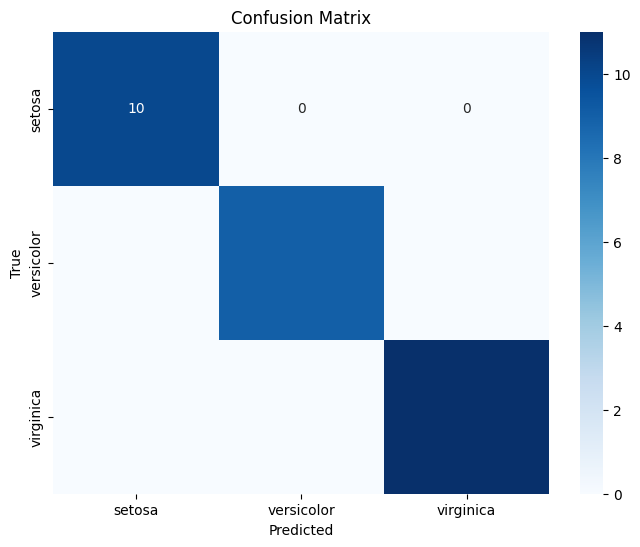

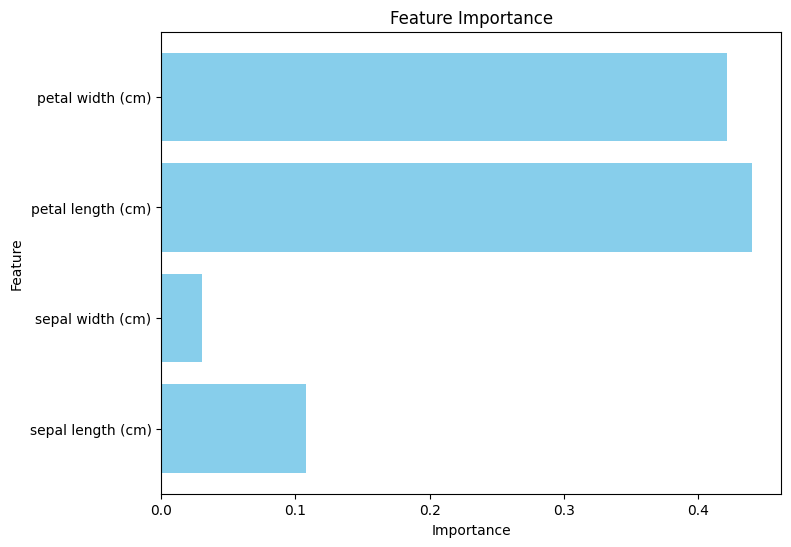

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

# 예시 데이터셋: 붓꽃(Iris) 데이터셋
iris = load_iris()
X = iris.data  # 특성 (Features)
y = iris.target  # 레이블 (Labels)

# 훈련용 데이터와 테스트용 데이터로 분리 (80% 훈련, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 랜덤 포레스트 모델 생성
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# 모델 학습
rf_model.fit(X_train, y_train)

# 테스트 데이터로 예측
rf_y_pred = rf_model.predict(X_test)

# 정확도 평가
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print(f"랜덤 포레스트 모델 정확도: {rf_accuracy * 100:.2f}%")

# 혼동 행렬 시각화
cm = confusion_matrix(y_test, rf_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# 특성 중요도 시각화
feature_importances = rf_model.feature_importances_
features = iris.feature_names

plt.figure(figsize=(8, 6))
plt.barh(features, feature_importances, color='skyblue')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [ ]:
# 출력 예시:
# 정확도: 랜덤 포레스트 모델의 정확도가 출력됩니다.
# 혼동 행렬: 예측된 값과 실제 값의 관계를 시각화한 혼동 행렬이 출력됩니다.
# 특성 중요도: 각 특성의 중요도를 보여주는 수평 바 차트가 출력됩니다.
# 추가 설명:
# 혼동 행렬은 분류 문제에서 모델이 어떻게 잘못 분류했는지, 즉 실제 클래스와 예측 클래스 사이의 차이를 보여주는 유용한 도구입니다.
# 특성 중요도는 모델이 예측할 때 어떤 특성이 중요한지 파악하는 데 유용하며, 데이터 분석에서 중요한 변수를 식별할 수 있습니다.

## 2. kaggle : Credit Card Fraud Detection

In [ ]:
# 코드 설명
# 데이터 로드: creditcard.csv 파일을 로드합니다. 이 데이터셋에는 약 28개의 익명화된 특징(V1, V2, ..., V28), Time, Amount, Class가 포함됩니다.
# 전처리:
# Class 컬럼이 타겟 변수(y), 나머지 컬럼이 특징 변수(X)입니다.
# Time과 Amount 컬럼은 스케일링을 적용하여 정규화합니다.
# 모델 학습:
# RandomForestClassifier 모델을 사용하며, n_estimators는 트리 개수, max_depth는 최대 깊이, class_weight='balanced'는 불균형 문제를 고려하여 클래스 비율을 자동으로 조정합니다.
# 모델 평가:
# 정확도, 혼동 행렬, 분류 보고서를 출력합니다.
# Precision, Recall, F1-score를 확인하여 성능을 평가할 수 있습니다.
# 특성 중요도 시각화:
# 랜덤 포레스트 모델의 각 특징이 예측에 얼마나 중요한지 시각화합니다.
#

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

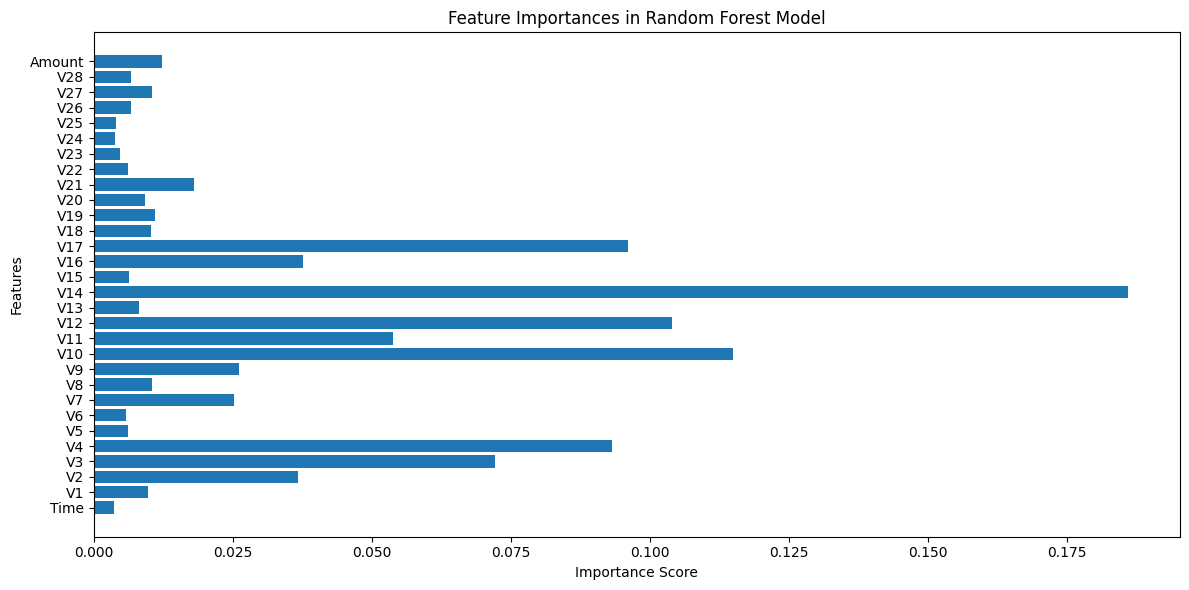

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Jupyter Notebook에서 그래프 출력 설정
%matplotlib inline

# 1. 데이터 로드
url = "https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv"
df = pd.read_csv(url)

# 2. 데이터 탐색
print(df.head())
print(df.info())
print(df['Class'].value_counts())

# 3. 데이터 전처리
X = df.drop(columns=['Class'])
y = df['Class']

scaler = StandardScaler()
X[['Time', 'Amount']] = scaler.fit_transform(X[['Time', 'Amount']])

# 4. 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 5. 랜덤 포레스트 모델 학습
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

# 6. 모델 평가
y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", classification_report(y_test, y_pred))

# 7. 특성 중요도 시각화
feature_importances = rf_model.feature_importances_
features = X.columns

plt.figure(figsize=(12, 6))
plt.barh(features, feature_importances)
plt.title('Feature Importances in Random Forest Model')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()
